In [363]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

plt.rcParams['font.family'] = 'Malgun Gothic'  # (Windows Ïö©) ÌïúÍ∏Ä Ï∂úÎ†•ÏùÑ ÏúÑÌïú Í∏ÄÍº¥ ÏÑ§Ï†ï
#plt.rcParams['font.family'] = 'AppleGothic'  # (MAC, Î¶¨ÎàÖÏä§ Ïö©)
plt.rcParams['axes.unicode_minus'] = False    # Î¨∏Ïûê - (ÎßàÏù¥ÎÑàÏä§) Ï†ïÏÉÅ Ï∂úÎ†•ÏùÑ ÏúÑÌïú ÏΩîÎìú

%matplotlib inline
pd.options.display.float_format = '{:20,.0f}'.format
pd.options.display.max_columns = 99
np.random.seed(42)

In [364]:
parking = pd.read_csv('Ïã§Ï†Ñdb.csv', encoding='cp949')

In [365]:
parking = parking.rename(columns=str.lower)

In [366]:
parking.describe()

user_id             store_id                count
count              879,271              879,271              879,271
mean             1,206,566              149,600                    1
std                420,653               68,898                    1
min                    224                    4                    1
25%                900,576               92,437                    1
50%              1,321,440              173,059                    1
75%              1,542,416              220,661                    1
max              1,830,598              231,465                   61

In [367]:
parking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879271 entries, 0 to 879270
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   user_id     879271 non-null  int64 
 1   join_date   879271 non-null  object
 2   d_type      879271 non-null  object
 3   store_id    879271 non-null  int64 
 4   goods_type  879271 non-null  object
 5   date        879271 non-null  object
 6   count       879271 non-null  int64 
 7   ad1         879271 non-null  object
dtypes: int64(3), object(5)
memory usage: 53.7+ MB


In [368]:
parking.head()

user_id   join_date d_type  store_id goods_type        date  count  ad1
0     2858  2014-01-07     AA      1892          A  2020-01-01      1   GN
1     5647  2014-02-14     BB    182009          A  2020-01-01      1    J
2    33314  2014-11-20     BB     82431          A  2020-01-01      1   SC
3    37001  2014-12-04     BB       725          C  2020-01-01      1   MP
4    37819  2014-12-07     AA    220691          C  2020-01-01      1  JRR

In [371]:
# Unix time error Ïñ¥ÎñªÍ≤å Ï≤òÎ¶¨?
parking[(parking['join_date'] < '2014-01-07')]

user_id   join_date d_type  store_id goods_type        date  count  \
437     1081430  1970-01-01     CC     90070          A  2020-01-01      1   
41867   1081430  1970-01-01     CC    105267          C  2020-01-24      2   
80732   1081430  1970-01-01     CC     90070          A  2020-02-15      1   
95915   1081430  1970-01-01     CC    182320          A  2020-02-23      1   
130040  1081430  1970-01-01     CC     90070          D  2020-03-12      1   
159509  1081430  1970-01-01     CC    203763          C  2020-03-26      1   
192785  1081430  1970-01-01     CC     90070          A  2020-04-11      1   
209170  1081430  1970-01-01     CC    106129          A  2020-04-19      1   
225122  1081430  1970-01-01     CC    182320          A  2020-04-26      1   
254373  1081430  1970-01-01     CC     90070          A  2020-05-10      1   
279183  1081430  1970-01-01     CC       725          C  2020-05-21      1   
287117  1081430  1970-01-01     CC     90070          A  2020-05-24      1   

        ad1  
437      GD  
41867    YO  
80732    GD  
95915   JRR  
130040   GD  
159509   MP  
192785   GD  
209170    J  
225122  JRR  
254373   GD  
279183   MP  
287117   GD

NAÍ∞íÏùÄ ÏóÜÎã§.
Î≥ÄÏàòÎì§Ïùò Í∞íÏùÑ ÌååÏïÖÌïòÍ∏∞ ÏúÑÌïú EDA ÏßÑÌñâ

In [335]:
# count
parking['count'].value_counts()

1     863775
2      13519
3       1061
4        271
5        136
6         66
7         45
9         25
16        21
12        21
8         20
13        19
14        19
15        19
28        17
10        16
11        15
17        15
23        15
21        14
18        14
25        14
19        13
22         9
32         9
26         9
27         7
24         7
30         7
31         7
34         7
29         6
20         6
36         5
40         4
37         3
39         3
38         3
46         3
49         3
35         3
42         2
43         2
33         2
50         2
47         2
55         1
53         1
51         1
58         1
41         1
48         1
45         1
44         1
59         1
61         1
Name: count, dtype: int64

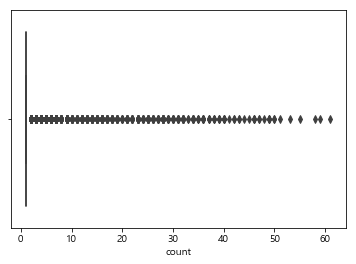

In [336]:
sns.boxplot(x = "count",
            data = parking)
plt.show()

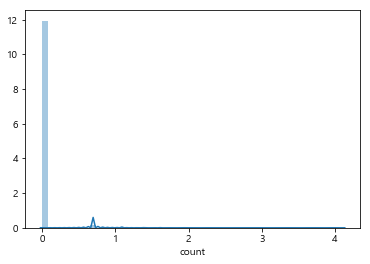

In [337]:
# count ÎπàÎèÑ log
sns.distplot(np.log(parking['count']));

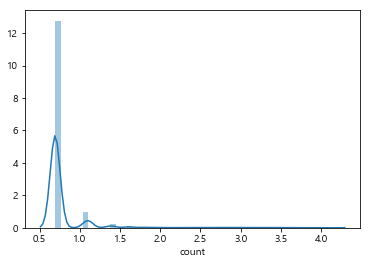

In [338]:
# count != 1 ÎπàÎèÑ
withoutcount1 = parking.drop(parking[parking['count'] == 1].index)
sns.distplot(np.log(withoutcount1['count']));

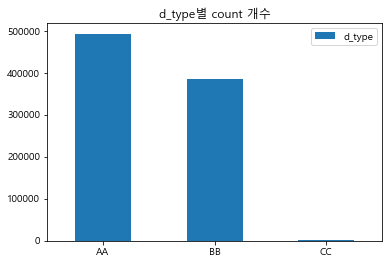

In [339]:
# d_type
countbytypes = pd.DataFrame(parking['d_type'].value_counts())
countbytypes.plot(kind = 'bar', title = 'd_typeÎ≥Ñ count Í∞úÏàò', rot = 0);

In [340]:
# goods_type
parking['goods_type'].value_counts()

A    609790
C    131163
B    118541
D     19777
Name: goods_type, dtype: int64

In [341]:
# dateÎ≥Ñ goods_typeÏùò Ìå®ÌÑ¥
parking.groupby(['date', 'goods_type']).size().unstack(fill_value=0).loc['2020-01-01':'2020-01-31',:]

goods_type     A    B    C    D
date                           
2020-01-01   661   34  210   19
2020-01-02   921  304  197   56
2020-01-03   905  505  268   46
2020-01-04  1553  144  454   37
2020-01-05  1065   56  351   27
2020-01-06   950  276  192   45
2020-01-07  1021  347  225   33
2020-01-08   997  437  195   33
2020-01-09   988  433  255   42
2020-01-10  1024  692  298   51
2020-01-11  1753  194  476   32
2020-01-12  1248   51  385   22
2020-01-13  1029  306  212   41
2020-01-14  1031  434  234   35
2020-01-15   993  428  261   32
2020-01-16  1001  481  241   33
2020-01-17  1171  663  345   46
2020-01-18  1895  184  603   48
2020-01-19  1244   44  364   18
2020-01-20  1094  352  248   67
2020-01-21  1134  473  238   27
2020-01-22  1176  475  263   27
2020-01-23  1098  423  325   73
2020-01-24   544   48  242  105
2020-01-25   342   30  109   61
2020-01-26   730   64  290   23
2020-01-27   810   43  288   26
2020-01-28  1106  319  222   52
2020-01-29  1197  408  272   70
2020-01-30  1147  427  280   45
2020-01-31  1247  574  319   58

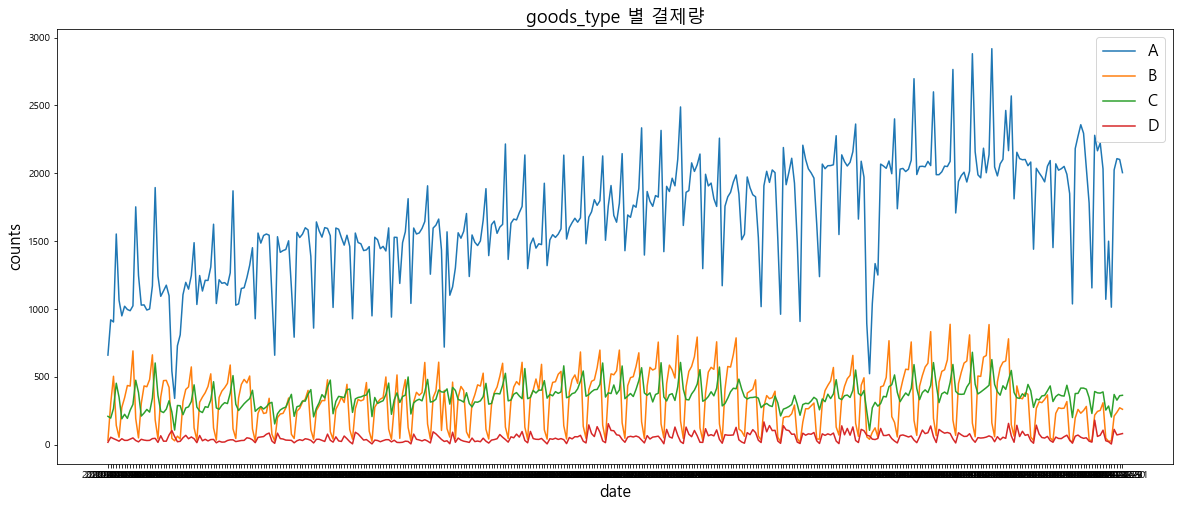

In [342]:
# goods_type Î≥Ñ Í≤∞Ï†úÎüâ ÏãúÍ∞ÅÌôî
countbydate = parking.groupby(['date', 'goods_type']).size().unstack(fill_value=0)

plt.figure(figsize=(20,8))
sns.lineplot(countbydate.index, countbydate['A'])
sns.lineplot(countbydate.index, countbydate['B'])
sns.lineplot(countbydate.index, countbydate['C'])
sns.lineplot(countbydate.index, countbydate['D'])

plt.legend(['A', 'B', 'C', 'D'], loc='best', fontsize=16)
plt.title('goods_type Î≥Ñ Í≤∞Ï†úÎüâ', fontsize=18)
plt.ylabel('counts', fontsize=16)
plt.xlabel('date', fontsize=16)
plt.xticks(ticks = None)
plt.show()


In [343]:
parking.groupby(['store_id', 'ad1']).size().unstack(fill_value=0).head(20)

ad1       0  ABP  ADS  AOI  BF  BHW  BI  BJG  BO  BOI  BP  BUD  CAS  CCA  CD  \
store_id                                                                       
4         0    0    0    0   0    0   0    0   0    0   0    0    0    0   0   
8         0    0    0    0   0    0   0    0   0    0   0    0    0    0   0   
161       0    0    0    0   0    0   0    0   0    0   0    0    0    0   0   
179       0    0    0    0   0    0   0    0   0    0   0    0    0    0   0   
262       0    0    0    0   0    0   0    0   0    0   0    0    0    0   0   
295       0    0    0    0   0    0   0    0   0    0   0    0    0    0   0   
353       0    0    0    0   0    0   0    0   0    0   0    0    0    0   0   
453       0    0    0    0   0    0   0    0   0    0   0    0    0    0   0   
456       0    0    0    0   0    0   0    0   0    0   0    0    0    0   0   
466       0    0    0    0   0    0   0    0   0    0   0    0    0    0   0   
472       0    0    0    0   0    0   0    0   0    0   0    0    0    0   0   
500       0    0    0    0   0    0   0    0   0    0   0    0    0    0   0   
564       0    0    0    0   0    0   0    0   0    0   0    0    0    0   0   
607       0    0    0    0   0    0   0    0   0    0   0    0    0    0   0   
635       0    0    0    0   0    0   0    0   0    0   0    0    0    0   0   
642       0    0    0    0   0    0   0    0   0    0   0    0    0    0   0   
647       0    0    0    0   0    0   0    0   0    0   0    0    0    0   0   
725       0    0    0    0   0    0   0    0   0    0   0    0    0    0   0   
774       0    0    0    0   0    0   0    0   0    0   0    0    0    0   0   
801       0    0    0    0   0    0   0    0   0    0   0    0    0    0   0   

ad1       CN  COI  CU  CVB  CY  DB  DIV  DJ  DM  DOI  DSO  DY  EP  GAS  GAY  \
store_id                                                                      
4          0    0   0    0   0   0    0   0   0    0    0   0   0    0    0   
8          0    0   0    0   0   0    0   0   0    0    0   0   0    0    0   
161        0    0   0    0   0   0    0   0   0    0    0   0   0    0    0   
179        0    0   0    0   0   0    0   0   0    0    0   0   0    0    0   
262        0    0   0    0   0   0    0   0   0    0    0   0   0    0    0   
295        0    0   0    0   0   0    0   0   0    0    0   0   0    0    0   
353        0    0   0    0   0   0    0   0   0    0    0   0   0    0    0   
453        0    0   0    0   0   0    0   0   0    0    0   0   0    0    0   
456        0    0   0    0   0   0    0   0   0    0    0   0   0    0    0   
466        0    0   0    0   0   0    0   0   0    0    0   0   0    0    0   
472        0    0   0    0   0   0    0   0   0    0    0   0   0    0    0   
500        0    0   0    0   0   0    0   0   0    0    0   0   0    0    0   
564        0    0   0    0   0   0    0   0   0    0    0   0   0    0    0   
607        0    0   0    0   0   0    0   0   0    0    0   0   0    0    0   
635        0    0   0    0   0   0    0   0   0    0    0   0   0    0    0   
642        0    0   0    0   0   0    0   0   0    0    0   0   0    0    0   
647        0    0   0    0   0   0    0   0   0    0    0   0   0    0    0   
725        0    0   0    0   0   0    0   0   0    0    0   0   0    0    0   
774        0    0   0    0   0   0    0   0   0    0    0   0   0    0    0   
801        0    0   0    0   0   0    0   0   0    0    0   0   0    0    0   

ad1       GB  GBC  GD  GEJ  GGC  GGM  GGY  GHN  GJ  GKP    GN  GPJ  GR  GS  \
store_id                                                                     
4          0    0   0    0    0    0    0    0   0    0     0    0   0   0   
8          0    0   0    0    0    0    0    0   0    0     0    0   0   0   
161        0    0   0    0    0    0    0    0   0    0     0    0   0   0   
179        0    0   0    0    0    0    0    0   0    0     0    0   0   0   
262        0    0   0    0    0 

In [344]:
parking['store_id'].value_counts()

220557    17617
220893    17220
220655    16275
220848    15935
92437     15866
          ...  
230996        1
230216        1
223665        1
223066        1
225629        1
Name: store_id, Length: 1061, dtype: int64

In [345]:
parking['ad1'].unique()

array(['GN', 'J', 'SC', 'MP', 'JRR', 'YD', 'GJ', 'YO', 'GSN', 'GBC', 'BF',
       'DJ', '0', 'CD', 'NO', 'CY', 'YC', 'SD', 'GD', 'GSW', 'DM', 'R',
       'GB', 'GS', 'GHN', 'SB', 'IND', 'P', 'GW', 'JR', 'GEJ', 'GGY',
       'GKP', 'CAS', 'SG', 'BJG', 'BHW', 'GAY', 'GYI', 'CCA', 'PJP',
       'GGC', 'IYS', 'DB', 'GGM', 'GAS', 'WOID', 'DIV', 'AOI', 'COI',
       'GPJ', 'SOI', 'ABP', 'DOI', 'WF', 'BI', 'ZP', 'EP', 'Q', 'BO',
       'ZE', 'RRR', 'QGI', 'DSO', 'SOD', 'BOI', 'WT', 'BP', 'SP', 'CN',
       'SJV', 'SDU', 'QH', 'BUD', 'CU', 'VU', 'WAE', 'NW', 'DY', 'WH',
       'GR', 'X', 'CVB', 'ADS', 'VO'], dtype=object)

#### üöôEDAÎ•º ÌÜµÌï¥ ÌååÏïÖÌïú Î≥ÄÏàòÏôÄ Ïπ¥ÌÖåÍ≥†Î¶¨ Í∞íÏùò ÎÇ¥Ïö©ÏùÄ ÏïÑÎûòÏôÄ Í∞ôÎã§.

1. count : Í≤∞Ï†ú Í±¥Ïàò
<br>Í∞úÏù∏Ïù¥ Ï£ºÏ∞®Î°ú ÌïòÎ£®Ïóê 61Í±¥ÏùÑ Í≤∞Ï†úÌïòÎäîÍ≤å ÎØøÍ∏∞ÏßÄ ÏïäÏßÄÎßå Ïñ¥Ï®ãÎì† data descriptionÏóêÏÑú countÎäî Í≤∞Ï†ú Í±¥ÏàòÎùºÍ≥† Î™ÖÏãúÌñàÎã§. Ï¢ÖÏÜç Î≥ÄÏàòÎùºÍ≥† Ï†ïÌï¥Ï£ºÏÖ®ÎäîÎç∞, 1Í∞íÏù¥ ÎÑàÎ¨¥ ÎßéÎã§. 1ÏùÑ ÎπºÍ≥† Î≥¥Î©¥ Îòê 2Í∞íÏù¥ ÎÑàÎ¨¥ ÎßéÎã§. Í∑πÎã®ÏπòÎ•º Ïñ¥ÎñªÍ≤å Ï†ïÌï†ÏßÄ ÏùòÎÖºÏù¥ ÌïÑÏöîÌï¥Î≥¥Ïù∏Îã§. ÏïÑÎãàÎ©¥ 1ÏùÑ Ï§ÑÏù¥Îäî Î∞©Î≤ïÎèÑ Í≥†Î†§Ìï¥ÏïºÍ≤†Îã§.
<br>
2. join_date : Í∞ÄÏûÖÏùº
<br>Í∞ÄÏûÖ ÎÇ†ÏßúÏóêÏÑú ÏñºÎßàÎÇò Ïò§ÎûòÎêú Ïú†Ï†ÄÏù∏ÏßÄ ÌååÏïÖÌï† Ïàò ÏûàÍ≤†Îã§. Î™á ÎÖÑÏ∞®Î°ú Î≥º ÏàòÎèÑ ÏûàÍ≤†ÏßÄÎßå Î™á Í∞úÏõîÏ∞®Î°ú Î≥¥Îäî Í≤ÉÏù¥ Î∞îÎûåÏßÅÌï¥ Î≥¥Ïù∏Îã§.
<br>
3. d_type : Í≤∞Ï†ú ÏàòÎã®
<br>Ï≤òÏùåÏóî Í∞íÏù¥ 3Í∞úÏù∏Í≤å Ï†úÌú¥/Í≥µÏú†/ÏÇ¨ÏÑ§Ï£ºÏ∞®Ïû•ÏúºÎ°ú ÎÇòÎà†ÏßÄÎäî Ï£ºÏ∞®Ïû• Ï†ïÎ≥¥Ïùº Í≤ÉÏù¥ÎùºÍ≥† ÏÉùÍ∞ÅÌñàÎã§. ÌïòÏßÄÎßå countÍ∞Ä Í≤∞Ï†ú Í±¥ÏàòÏù∏Îç∞ ÏÇ¨ÏÑ§ Ï£ºÏ∞®Ïû•ÏùÄ ÏúÑÏπò Ï†ïÎ≥¥Îßå Ï†úÍ≥µÌïòÍ≥† Í≤∞Ï†úÎäî Ìï† Ïàò ÏóÜÎã§. Îî∞ÎùºÏÑú Ï£ºÏ∞®Ïû• Ï†ïÎ≥¥Îäî ÏïÑÎãê Í≤ÉÏù¥Îã§. 3Í∞úÎ°ú ÎÇòÎà†ÏßÄÎäî Ï†ïÎ≥¥Í∞Ä Î≠êÍ∞Ä ÏûàÎÇò **Î™®ÎëêÏùò Ï£ºÏ∞®Ïû• Ïï±**ÏùÑ Ï∞æÏïÑÎ≥¥Îãà Í≤∞Ï†ú ÏàòÎã®Ïù∏ Í≤ÉÏúºÎ°ú ÌåêÎã®ÎêúÎã§. Í≤∞Ï†ú ÏàòÎã®ÏùÄ Ïπ¥Îìú/ÎÑ§Ïù¥Î≤ÑÌéòÏù¥/Ìú¥ÎåÄÌè∞ Í≤∞Ï†ú Ïù¥Î†áÍ≤å ÎÇòÎàå Ïàò ÏûàÎã§.
<br>
4. ad1 : ÏÑúÏö∏ ÏßÄÏó≠ ÏΩîÎìú
<br>GNÏùÄ Í∞ïÎÇ® JÎäî Ï§ëÍµ¨ Í∞ôÎã§Îäî ÌåÄ ÌöåÏùò ÏïÑÏù¥ÎîîÏñ¥Î•º Îì£Í≥† ÏÑúÏö∏Ïãú ÌñâÏ†ïÍµ¨Ïó≠ ÏΩîÎìúÎùºÍ≥† ÏÉùÍ∞ÅÌñàÏúºÎÇò Í∞íÏù¥ 85Í∞úÎùº ÏÑúÏö∏Ïãú ÌñâÏ†ïÍµ¨Ïó≠ ÏΩîÎìúÎäî ÏïÑÎãå Í≤ÉÏúºÎ°ú Î≥¥Ïù∏Îã§. Í∑∏Î†áÎã§Í≥† Ï†ÑÍµ≠ ÏßÄÏó≠ ÏΩîÎìúÎùºÍ≥†Îäî Î≥¥Ïù¥ÏßÄ ÏïäÎäîÍ≤å Ìï®Íªò Ï£ºÏñ¥ÏßÑ ÍµêÌÜµÎüâ Îç∞Ïù¥ÌÑ∞Í∞Ä ÏÑúÏö∏ÏßÄÏó≠Îßå ÏûàÎã§. Í∑∏ÎûòÏÑú ÏÑúÏö∏ ÏßÄÏó≠ ÏΩîÎìúÏù∏ÎìØ.
<br>
5. store_id : ÏßÄÏó≠ ÏΩîÎìú ÏÑ∏Î∂Ñ Î≤àÌò∏
<br>Í∞ïÎÇ®1, Í∞ïÎÇ®2 Ïù¥Îü∞ ÏãùÏúºÎ°ú ÏßÄÏó≠ ÏÑ∏Î∂ÑÌôî ÌïòÎäî ÎÑòÎ≤ÑÍ∞Ä store_idÏù∏ Í≤ÉÏúºÎ°ú Î≥¥Ïù∏Îã§. GN Î∞ëÏóê Ïó¨Îü¨ store_idÍ∞Ä Îì§Ïñ¥Í∞ÄÎäîÎç∞, store_idÍ∞Ä Ïó¨Îü¨ GNÏóê Îì§Ïñ¥Í∞ÄÏßÄ ÏïäÎäîÎã§. 1:n Í¥ÄÍ≥Ñ
<br>
6. goods_type : ÌåêÎß§Í∂å
<br>
ÌåêÎß§Í∂åÏùÄ Í∞íÏù¥ 4Í∞ú Ïù¥ÏÉÅÏù¥Îã§. ÎãπÏùºÍ∂å, ÏãúÍ∞ÑÏ†ú, Ïã¨Ïïº, ÏïºÍ∞Ñ, ÏõîÎ≥Ñ Ï£ºÏ∞®Í∂å Îì±Ïù¥ ÏûàÎã§. goods_typeÏùÄ Ïù¥Îü∞ Í≤ÉÎì§ÏùÑ Î≠âÎö±Í∑∏Î†§ Ìï©Ïπú Í≤ÉÏúºÎ°ú A, B, C, DÍ∞Ä Í∞ÅÍ∞Å Ï†úÌú¥Ï£ºÍ∞Ñ, Ï†úÌú¥ÏïºÍ∞Ñ, Í≥µÏú†Ï£ºÍ∞Ñ, Í≥µÏú†ÏïºÍ∞Ñ Ï£ºÏ∞®Í∂åÏùò Ìï©ÏúºÎ°ú Î≥¥Ïù∏Îã§. Ïù¥Ïú†Îäî ÎÇ†ÏßúÎ≥Ñ Îç∞Ïù¥ÌÑ∞Î•º Î≥¥Í≥† ÌååÏïÖÌñàÎäîÎç∞, AÏôÄ CÎäî ÌÜ†ÏöîÏùºÏóê Ï¶ùÍ∞ÄÌïòÎäî Î∞òÎ©¥ BÏôÄ DÎäî Í∏àÏöîÏùºÏóê Ï¶ùÍ∞ÄÌïòÍ≥† ÏùºÏöîÏùºÏóê Î∞îÎã•ÏùÑ ÏπúÎã§. Ïù¥Î†áÍ≤å AÏôÄ C, BÏôÄ DÍ∞Ä ÎπÑÏä∑Ìïú Î™®ÏäµÏùÑ Î≥¥Ïù¥ÎäîÎç∞ Ï†úÌú¥ Ï£ºÏ∞®Ïû•Í≥º Í≥µÏú† Ï£ºÏ∞®Ïû•Ïùò Í∑úÎ™® Ï∞®Ïù¥Í∞Ä ÏûàÎäîÍ≤å Ïù¥Î†áÍ≤å ÎÇòÌÉÄÎÇòÎäî Í≤ÉÏúºÎ°ú ÌååÏïÖÌñàÎã§.
<br>

|Íµ¨Î∂Ñ|Ï£ºÍ∞Ñ|ÏïºÍ∞Ñ|
|---|---|---|
|Ï†úÌú¥|A|B|
|Í≥µÏú†|C|D|



#### üîßFeature Engineering ÏßÑÌñâ

In [346]:
weather_data = pd.read_csv('ÏÑúÏö∏Ïãú_Í∏∞ÏÉÅÎç∞Ïù¥ÌÑ∞.csv', encoding='cp949')
weather_data.dtypes

ÏßÄÏ†ê        int64
ÏùºÏãú       object
Í∏∞Ïò®      float64
Í∞ïÏàòÎüâ     float64
ÌíçÏÜç      float64
ÏäµÎèÑ        int64
ÏùºÏ°∞ÏãúÍ∞Ñ    float64
Ï†ÅÏÑ§Îüâ     float64
ÏßÄÎ©¥Ïò®ÎèÑ    float64
ÏßÄÏ§ëÏò®ÎèÑ    float64
dtype: object

In [347]:
weather_data['ÏùºÏãú'] = weather_data['ÏùºÏãú'].astype('datetime64')
weather_data['date'] = weather_data['ÏùºÏãú'].dt.date
weather_data = weather_data.fillna(0)

In [348]:
weather_mean = weather_data.groupby('date').mean()
weather_mean

ÏßÄÏ†ê                   Í∏∞Ïò®                  Í∞ïÏàòÎüâ  \
date                                                                        
2020-01-01                  108                   -3                    0   
2020-01-02                  108                    1                    0   
2020-01-03                  108                    0                    0   
2020-01-04                  108                    1                    0   
2020-01-05                  108                    1                    0   
...                         ...                  ...                  ...   
2020-12-27                  108                    5                    0   
2020-12-28                  108                    7                    0   
2020-12-29                  108                    1                    0   
2020-12-30                  108                  -10                    0   
2020-12-31                  108                  -13                    0   

                             ÌíçÏÜç                   ÏäµÎèÑ                 ÏùºÏ°∞ÏãúÍ∞Ñ  \
date                                                                        
2020-01-01                    1                   63                    0   
2020-01-02                    2                   65                    0   
2020-01-03                    2                   58                    0   
2020-01-04                    2                   51                    0   
2020-01-05                    1                   46                    0   
...                         ...                  ...                  ...   
2020-12-27                    2                   63                    0   
2020-12-28                    1                   71                    0   
2020-12-29                    3                   72                    0   
2020-12-30                    4                   55                    0   
2020-12-31                    3                   52                    0   

                            Ï†ÅÏÑ§Îüâ                 ÏßÄÎ©¥Ïò®ÎèÑ                 ÏßÄÏ§ëÏò®ÎèÑ  
date                                                                       
2020-01-01                    0                   -1                    3  
2020-01-02                    0                   -0                    3  
2020-01-03                    0                   -1                    3  
2020-01-04                    0                   -0                    3  
2020-01-05                    0                   -1                    3  
...                         ...                  ...                  ...  
2020-12-27                    0                    1                    2  
2020-12-28                    0                    3                    2  
2020-12-29                    0                   -0                    3  
2020-12-30                    0                   -4                    2  
2020-12-31                    0                   -8                    2  

[366 rows x 9 columns]

In [349]:
weather_mean['weather'] = np.where(weather_mean["Í∞ïÏàòÎüâ"].values >= 0.1 , "rain", np.where(weather_mean['Ï†ÅÏÑ§Îüâ'].values > 0, 'snow', 'none'))
weather_mean['weather'].value_counts()
weather_mean.iloc[40:50,:]

ÏßÄÏ†ê                   Í∏∞Ïò®                  Í∞ïÏàòÎüâ  \
date                                                                        
2020-02-10                  108                    4                    0   
2020-02-11                  108                    6                    0   
2020-02-12                  108                    7                    0   
2020-02-13                  108                    7                    0   
2020-02-14                  108                    8                    0   
2020-02-15                  108                   10                    0   
2020-02-16                  108                   -1                    1   
2020-02-17                  108                   -6                    0   
2020-02-18                  108                   -4                    0   
2020-02-19                  108                    1                    0   

                             ÌíçÏÜç                   ÏäµÎèÑ                 ÏùºÏ°∞ÏãúÍ∞Ñ  \
date                                                                        
2020-02-10                    2                   51                    0   
2020-02-11                    2                   39                    0   
2020-02-12                    2                   69                    0   
2020-02-13                    2                   85                    0   
2020-02-14                    1                   71                    0   
2020-02-15                    3                   62                    0   
2020-02-16                    4                   83                    0   
2020-02-17                    3                   67                    0   
2020-02-18                    2                   44                    0   
2020-02-19                    2                   55                    0   

                            Ï†ÅÏÑ§Îüâ                 ÏßÄÎ©¥Ïò®ÎèÑ                 ÏßÄÏ§ëÏò®ÎèÑ  \
date                                                                        
2020-02-10                    0                    3                    3   
2020-02-11                    0                    3                    3   
2020-02-12                    0                    6                    4   
2020-02-13                    0                    7                    5   
2020-02-14                    0                    7                    6   
2020-02-15                    0                    7                    6   
2020-02-16                    2                    2                    6   
2020-02-17                    3                    0                    5   
2020-02-18                    1                   -0                    4   
2020-02-19                    0                    1                    3   

           weather  
date                
2020-02-10    none  
2020-02-11    none  
2020-02-12    rain  
2020-02-13    none  
2020-02-14    none  
2020-02-15    none  
2020-02-16    rain  
2020-02-17    snow  
2020-02-18    snow  
2020-02-19    none

In [350]:
weather_mean = weather_mean.rename_axis('date').reset_index()

In [351]:
just_weather = weather_mean[['date', 'weather']]
just_weather

date weather
0    2020-01-01    none
1    2020-01-02    none
2    2020-01-03    none
3    2020-01-04    none
4    2020-01-05    none
..          ...     ...
361  2020-12-27    none
362  2020-12-28    none
363  2020-12-29    none
364  2020-12-30    none
365  2020-12-31    none

[366 rows x 2 columns]

In [352]:
parking = pd.merge(parking, weather_mean[['date', 'weather']], how = 'left', on = 'date').fillna('none')

In [353]:
# feature engineering
# Í∏∞Î≥∏ ÎÇ†Ïßú Îç∞Ïù¥ÌÑ∞ Ï™ºÍ∞úÍ∏∞
parking['date'] = parking['date'].astype('datetime64')
parking['year'] = parking['date'].dt.year
parking['month'] = parking['date'].dt.month
parking['day'] = parking['date'].dt.day
parking['week'] = parking['date'].dt.isocalendar().week

# Í≥µÌú¥Ïùº Ï∂îÍ∞Ä
parking['isholiday'] = parking['date'].isin(['2020-01-01', '2020-01-24', '2020-01-25', '2020-01-26', '2020-03-01', '2020-04-30', '2020-05-05', '2020-06-06', '2020-08-15', '2020-08-17', '2020-09-30', '2020-10-01', '2020-10-02', '2020-10-03', '2020-10-09', '2020-12-25'])

# Î™áÍ∞úÏõîÏ∞® Ïú†Ï†Ä?
# 0Í∞úÏõîÏ∞® Ïú†Ï†ÄÎ•º ÏóÜÏï†Ï£ºÍ∏∞ ÏúÑÌï¥ Íµ¨Îß§ÎÇ†Ïßú - Í∞ÄÏûÖÎÇ†Ïßú + 1
parking['join_date'] = parking['join_date'].astype('datetime64')
parking['howlonguser'] = (parking['year']*12 + parking['month']) - (parking['join_date'].dt.year*12 + parking['join_date'].dt.month) + 1

In [354]:
parking

user_id  join_date d_type  store_id goods_type       date  count  ad1  \
0          2858 2014-01-07     AA      1892          A 2020-01-01      1   GN   
1          5647 2014-02-14     BB    182009          A 2020-01-01      1    J   
2         33314 2014-11-20     BB     82431          A 2020-01-01      1   SC   
3         37001 2014-12-04     BB       725          C 2020-01-01      1   MP   
4         37819 2014-12-07     AA    220691          C 2020-01-01      1  JRR   
...         ...        ...    ...       ...        ...        ...    ...  ...   
879266  1830551 2020-12-31     BB    219886          B 2020-12-31      1   GN   
879267  1830570 2020-12-31     BB     82433          B 2020-12-31      1   CY   
879268  1830580 2020-12-31     AA     92020          B 2020-12-31      1  JRR   
879269  1830589 2020-12-31     BB     92437          B 2020-12-31      1    J   
879270  1830598 2020-12-31     AA    220959          B 2020-12-31      1   SC   

       weather  year  month  day  week  isholiday  howlonguser  
0         none  2020      1    1     1       True           73  
1         none  2020      1    1     1       True           72  
2         none  2020      1    1     1       True           63  
3         none  2020      1    1     1       True           62  
4         none  2020      1    1     1       True           62  
...        ...   ...    ...  ...   ...        ...          ...  
879266    none  2020     12   31    53      False            1  
879267    none  2020     12   31    53      False            1  
879268    none  2020     12   31    53      False            1  
879269    none  2020     12   31    53      False            1  
879270    none  2020     12   31    53      False            1  

[879271 rows x 15 columns]

#### Feature Engineering ÎÇ¥Ïö© Ï†ïÎ¶¨

1. Ï£ºÏñ¥ÏßÑ ÏÑúÏö∏Ïãú Í∏∞ÏÉÅÎç∞Ïù¥ÌÑ∞ csv ÌååÏùºÎ°ú `weather` Î≥ÄÏàòÎ•º Ï∂îÍ∞ÄÌñàÎã§. ÌÅ¨Í≤å 'ÎπÑ', 'Îàà', 'Ìï¥ÎãπÏóÜÏùå' Ïù¥Î†áÍ≤å 3Í∞ÄÏßÄ Í∞íÎßå Í∞ÄÏßÄÍ≥† ÏûàÎã§.
2. ÎÇ†ÏßúÎäî Ïó∞, Ïõî, Ïùº, Ï£ºÏ∞®Î°ú Ï™ºÍ∞úÏÑú Ï†ÄÏû•ÌïòÏó¨ Í∞ÅÍ∞Å `year`, `month`, `day`, `week`Ïùò Î≥ÄÏàòÎ•º Ï∂îÍ∞ÄÌñàÎã§. Ïù¥ Ï§ë Ïó∞ÎèÑ Îç∞Ïù¥ÌÑ∞Í∞Ä ÌïÑÏöîÌï†ÏßÄÎäî Î™®Î•¥Í≤†ÏßÄÎßå Ïö∞ÏÑ† ÏßÑÌñâÌïúÎã§.
3. (Í≤∞Ï†úÎÖÑÏõî - Í∞ÄÏûÖÎÖÑÏõî)Î°ú Î™áÍ∞úÏõîÏ∞® Ïú†Ï†ÄÏù∏ÏßÄ ÌååÏïÖÌïòÎäî Î≥ÄÏàò `howlonguser`Î•º ÎßåÎì§ÏóàÎã§. countÏôÄ Í¥ÄÍ≥ÑÎ•º Î≥¥Í≥† Ïò§Îûú Ïú†Ï†ÄÏùºÏàòÎ°ù Í≤∞Ï†ú Í±¥ÏàòÍ∞Ä Ïñ¥ÎñªÍ≤å Îã¨ÎùºÏßÄÎäîÏßÄ ÌôïÏù∏Ìï† Ïàò ÏûàÍ≤†Îã§.
4. Íµ≠Í∞Ä Í≥µÌú¥Ïùº Îç∞Ïù¥ÌÑ∞Ïù∏ `isholiday` Î≥ÄÏàòÎ•º Ï∂îÍ∞ÄÌñàÎã§. Íµ≠Í∞Ä Í≥µÌú¥ÏùºÏùÄ apiÎ°ú Î∞õÎäî Î∞©Î≤ïÎèÑ ÏûàÎäî Í≤É Í∞ôÎã§. ÌïòÏßÄÎßå key ÏûÖÎ†• Îì± Îπ†Î•∏ Í≥µÏú†Îäî ÌûòÎì§Ïñ¥ Î≥¥Ïù¥Í≥†, 2020ÎÖÑÏóê ÌïúÏ†ïÎêú Îç∞Ïù¥ÌÑ∞Îßå ÏßëÏñ¥ÎÑ£ÏúºÎ©¥ ÎêòÎØÄÎ°ú Îã§ÏùåÏùò ÏÇ¨Ïù¥Ìä∏Î•º Ï∞∏Í≥†ÌïòÏó¨ Í≥µÌú¥Ïùº Ïª¨ÎüºÏùÑ ÎßåÎì§ÏóàÎã§.<br>
https://publicholidays.co.kr/ko/2020-dates/
ÌïúÌé∏ feature engineeringÏúºÎ°ú ÏÇ¥Ìé¥Î¥êÏïºÌï† ÏöîÏÜåÍ∞Ä ÎßéÏïÑÏ°åÎã§. Ï∂îÍ∞ÄÏ†ÅÏù∏ EDAÎ•º ÏßÑÌñâÌï¥Î≥¥Ïûê.

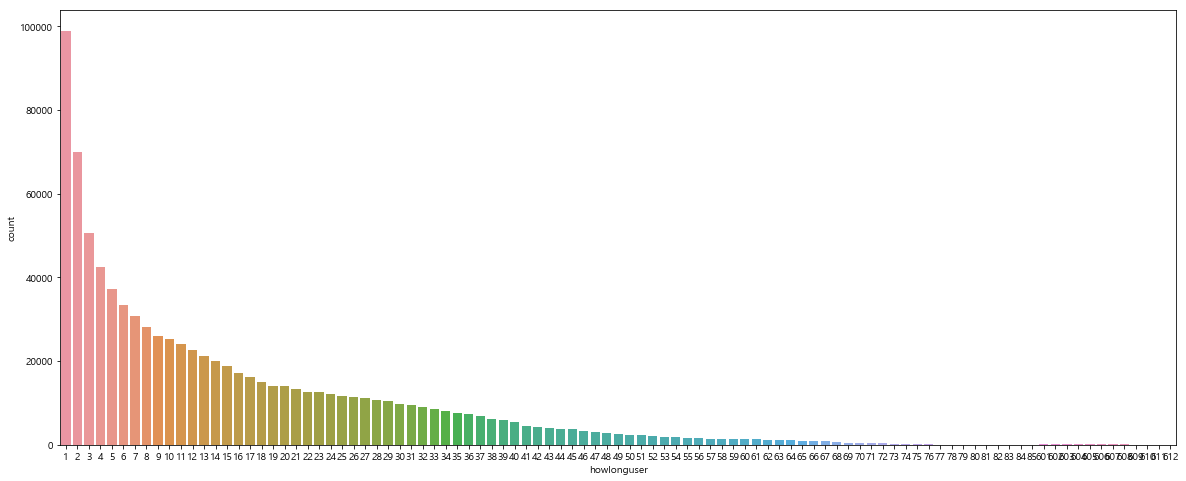

In [355]:
plt.figure(figsize=(20,8))
users = sns.countplot(data = parking, x = 'howlonguser');